In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import hvplot.pandas
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="UofT_project_1")

In [3]:
# Please remember to put the path to respective datasets
stock_data = pd.read_csv(r"C:\Users\adibt\TEAM1PROJECT1\PROJECT1DATA\sp500_stocks.csv")
companies_data = pd.read_csv(r"C:\Users\adibt\TEAM1PROJECT1\PROJECT1DATA\sp500_companies.csv")
inflation = pd.read_excel(r"C:\Users\adibt\TEAM1PROJECT1\PROJECT1DATA\inflation.xlsx")
unemployment = pd.read_excel(r"C:\Users\adibt\TEAM1PROJECT1\PROJECT1DATA\unemployment.xlsx")
mortgage = pd.read_csv(r"C:\Users\adibt\TEAM1PROJECT1\PROJECT1DATA\US_mortgages.csv")

- ## Data Cleaning

In [4]:
#Industiries data
industry_data = companies_data.drop(["Weight", "Longbusinesssummary", "Shortname", "Exchange"], axis=1).copy()

columns_for_convert = ["Currentprice", "Ebitda", "Revenuegrowth", "Fulltimeemployees"]

industry_data["Ebitda"] = industry_data["Ebitda"]/1000000
industry_data["Ebitda"] = industry_data["Ebitda"].apply(lambda x: f"{x:.2f}")

for i in columns_for_convert:
    industry_data[i] = pd.to_numeric(industry_data[i], errors="coerce")

industry_data.rename(columns={"Ebitda": "Ebitda (mil)"}, inplace=True)
industry_data.head()

,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda (mil),Revenuegrowth,City,State,Country,Fulltimeemployees
0,MSFT,Microsoft Corporation,Technology,Software - Infrastructure,426.28,3167447941120,118427.0,0.176,Redmond,WA,United States,221000.0
1,AAPL,Apple Inc.,Technology,Consumer Electronics,169.67,2620027043840,130109.0,0.021,Cupertino,CA,United States,161000.0
2,NVDA,NVIDIA Corporation,Technology,Semiconductors,853.54,2133849931776,34480.0,2.653,Santa Clara,CA,United States,29600.0
3,GOOG,Alphabet Inc.,Communication Services,Internet Content & Information,158.14,1958832766976,100172.0,0.135,Mountain View,CA,United States,182502.0
4,GOOGL,Alphabet Inc.,Communication Services,Internet Content & Information,156.60,1953130872832,100172.0,0.135,Mountain View,CA,United States,182502.0


In [5]:
#Companies data
real_st = industry_data[industry_data["Sector"] == "Real Estate"].copy()
reals_st_symbols = real_st["Symbol"].unique()
real_st.head()

,Symbol,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda (mil),Revenuegrowth,City,State,Country,Fulltimeemployees
82,PLD,"Prologis, Inc.",Real Estate,REIT - Industrial,126.26,116796563456,5876.60,0.087,San Francisco,CA,United States,2574.0
105,AMT,American Tower Corporation,Real Estate,REIT - Specialty,192.81,89917325312,6897.00,0.030,Boston,MA,United States,5643.0
122,EQIX,"Equinix, Inc.",Real Estate,REIT - Specialty,801.24,75814453248,2865.91,0.154,Redwood City,CA,United States,13151.0
159,SPG,"Simon Property Group, Inc.",Real Estate,REIT - Retail,150.19,56263876608,4106.49,0.091,Indianapolis,IN,United States,2500.0
174,WELL,Welltower Inc.,Real Estate,REIT - Healthcare Facilities,92.00,52336779264,2564.66,0.199,Toledo,OH,United States,533.0


In [6]:
#Stock Data
stock_data_dropped = stock_data.drop("Adj Close", axis=1)
stock_data_rlst = stock_data_dropped[stock_data_dropped["Symbol"].isin(reals_st_symbols)].copy()
stock_data_rlst["Date"] = pd.to_datetime(stock_data_rlst["Date"])
stock_rlst_2020 = stock_data_rlst[stock_data_rlst["Date"].dt.year == 2020].copy()
stock_rlst_2020.head()

,Date,Symbol,Close,High,Low,Open,Volume
52776,2020-01-02,ARE,159.729996,162.419998,158.520004,161.929993,1094900.0
52777,2020-01-03,ARE,160.639999,161.360001,158.500000,158.500000,371300.0
52778,2020-01-06,ARE,161.029999,161.580002,159.589996,160.039993,604700.0
52779,2020-01-07,ARE,155.759995,157.529999,154.699997,156.490005,4543900.0
52780,2020-01-08,ARE,157.830002,158.000000,155.779999,156.500000,2239300.0


In [7]:
#Avereging Stock Data
stock_rlst_2020_exp = stock_rlst_2020.copy()
stock_rlst_2020_exp["Date"] = stock_rlst_2020_exp["Date"].dt.strftime("%b")
stock_m_mean = stock_rlst_2020_exp.groupby(['Symbol', 'Date'], as_index=False).mean()
stock_m_mean = stock_m_mean.round(2)
month_order= {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
stock_m_mean['Order'] = stock_m_mean['Date'].map(month_order)

final_stock = stock_m_mean.sort_values(by=['Symbol', 'Order']).drop(columns=["Order"])

final_stock.head()

,Symbol,Date,Close,High,Low,Open,Volume
4,AMT,Jan,232.61,234.25,230.90,232.44,1490361.90
3,AMT,Feb,244.26,247.06,241.70,244.30,2105152.63
7,AMT,Mar,222.87,230.62,213.32,220.18,3515518.18
0,AMT,Apr,242.19,246.92,236.87,242.07,2490004.76
8,AMT,May,238.06,241.06,234.24,237.92,1975800.00


In [8]:
# Inflation
inflation_2020 = inflation[inflation["Year"] == 2020]
inflation_trnsp = inflation_2020.transpose()
inflation_trnsp.reset_index(inplace=True)
inflation_trnsp.columns = ['Date', 'Inflation Rate']
inflation_trnsp = inflation_trnsp[1:]
inflation_trnsp = inflation_trnsp.iloc[:-2]
print(inflation_trnsp)


   Date  Inflation Rate
1   Jan             2.3
2   Feb             2.4
3   Mar             2.1
4   Apr             1.4
5   May             1.2
6   Jun             1.2
7   Jul             1.6
8   Aug             1.7
9   Sep             1.7
10  Oct             1.6
11  Nov             1.6
12  Dec             1.6


In [9]:
# Mortgage 
mortgage['DATE'] = pd.to_datetime(mortgage['DATE'])
mortgage_2020= mortgage[mortgage['DATE'].dt.year == 2020]
mortgage_2020.set_index('DATE', inplace=True)
mortgage_monthly_avg = mortgage_2020.resample('M').mean()
mortgage_monthly_avg.reset_index(inplace=True)
mortgage_monthly_avg = mortgage_monthly_avg.rename(columns={"DATE": "Date", "MORTGAGE5US": "Avg Mortgage Rate"})
mortgage_monthly_avg["Date"] = mortgage_monthly_avg["Date"].dt.strftime("%b")
mortgage_monthly_avg['Avg Mortgage Rate'] = mortgage_monthly_avg['Avg Mortgage Rate'].round(1)

In [10]:
# Unemployment
unemployment_2020 = unemployment[unemployment["Year"] == 2020]
unemplotment_trnsp = unemployment_2020.transpose()
unemplotment_trnsp.reset_index(inplace=True)
unemplotment_trnsp.columns = ['Date', 'Unemployment Rate']
unemplotment_trnsp = unemplotment_trnsp[1:]
print(unemplotment_trnsp)

   Date  Unemployment Rate
1   Jan                3.6
2   Feb                3.5
3   Mar                4.4
4   Apr               14.8
5   May               13.2
6   Jun               11.0
7   Jul               10.2
8   Aug                8.4
9   Sep                7.8
10  Oct                6.8
11  Nov                6.7
12  Dec                6.7


In [11]:
# Mergging 
inf_mrt_merge = pd.merge(inflation_trnsp, mortgage_monthly_avg, on="Date", how="inner")
clean_rates = pd.merge(inf_mrt_merge, unemplotment_trnsp, on="Date", how="inner")
clean_rates.head()

,Date,Inflation Rate,Avg Mortgage Rate,Unemployment Rate
0,Jan,2.3,3.3,3.6
1,Feb,2.4,3.3,3.5
2,Mar,2.1,3.2,4.4
3,Apr,1.4,3.3,14.8
4,May,1.2,3.2,13.2


## Data Viz

In [12]:
realst_geo_map = real_st[["Longname", "Ebitda (mil)", "City", "State"]]

In [13]:
lat = []
lng = []

for index, i in realst_geo_map.iterrows():
    try:
        location = geolocator.geocode(f"{i['City']}, {i['State']}")
        lat.append(location.latitude)
        lng.append(location.longitude)
    except AttributeError:
        lat.append(None)
        lng.append(None)


realst_geo_map.loc[:, "Latitude"] = lat
realst_geo_map.loc[:, "Longitude"] = lng

C:\Users\adibt\AppData\Local\Temp\ipykernel_18464\839205091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realst_geo_map.loc[:, "Latitude"] = lat
C:\Users\adibt\AppData\Local\Temp\ipykernel_18464\839205091.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realst_geo_map.loc[:, "Longitude"] = lng


In [14]:
# Configure the map plot
map_plot = realst_geo_map.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    size = "Ebitda (mil)",
    scale = 0.5,
    color = "Longname",
    alpha=0.5
)

# Display the map
map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Longname,Ebitda (mil))

In [15]:
# Annual performace of the companies  

# Filter for January's opening prices
jan_open = final_stock[final_stock["Date"] == "Jan"][["Symbol", "Open"]].set_index("Symbol")

# Filter for December's closing prices
dec_close = final_stock[final_stock["Date"] == "Dec"][["Symbol", "Close"]].set_index("Symbol")

# Calculate the rate of return
annual_pref = (( dec_close["Close"] - jan_open["Open"]) / jan_open["Open"])*100

# Create a new DataFrame for rate of returns
annual_pref_data = pd.DataFrame(annual_pref, columns=["Annual Performance"])
annual_pref_data.reset_index(inplace=True)

# Show the results
annual_pref_data.head()

,Symbol,Annual Performance
0,AMT,-4.439855
1,ARE,7.174666
2,AVB,-23.441022
3,BXP,-29.044595
4,CBRE,5.479677


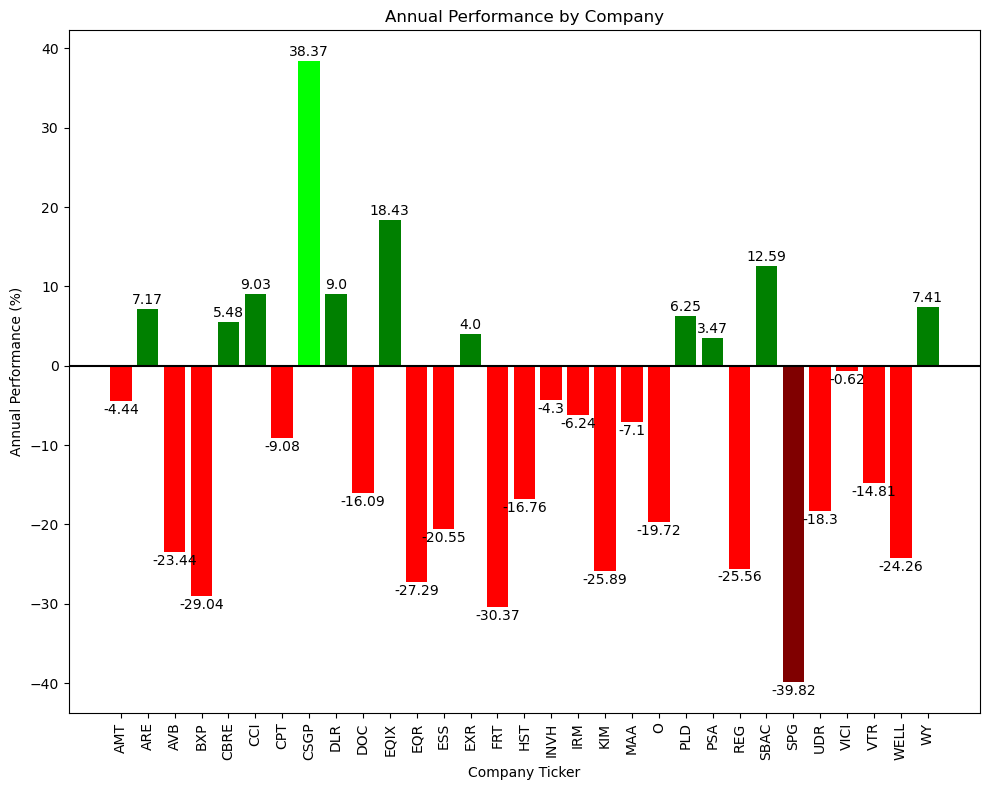

In [16]:
# Bar Graph Visualization
# Assign colors 
colors = []
max_ror = annual_pref_data["Annual Performance"].max()
min_ror = annual_pref_data["Annual Performance"].min()

for rates in annual_pref_data["Annual Performance"]:
    if rates == max_ror:
        colors.append("lime")
    elif rates == min_ror:
        colors.append("maroon")
    else:
        colors.append("green" if rates >= 0 else "red")

# Create an area for the graph
plt.figure(figsize=(10, 8))

# Plot the bar graph and assign the lables 
ror_bars = plt.bar(annual_pref_data["Symbol"], annual_pref_data["Annual Performance"], color=colors)
plt.xlabel("Company Ticker")
plt.ylabel("Annual Performance (%)")
plt.title("Annual Performance by Company") 
plt.xticks(rotation=90)

#Adding a breakpoint line
plt.axhline(y=0, color="black", linewidth=1.5)

#Adding values positioning
for bar in ror_bars:
    ror_values = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, 
             ror_values + 2 if ror_values > 0 else ror_values -2, 
             round(ror_values, 2), ha="center" ,va= "top" if ror_values > 0 else "bottom")

# Accurately display the graph
plt.tight_layout() 

# Show the graph
plt.show()

In [17]:
# Calculating Monthly ROR
final_stock['ROR (by month)'] = ((final_stock['Open']-final_stock["Close"])/final_stock['Open'])*100
final_stock.dtypes

Symbol             object
Date               object
Close             float64
High              float64
Low               float64
Open              float64
Volume            float64
ROR (by month)    float64
dtype: object

In [28]:
#Monthly ROR of all REITS from S&P500 
# AMT ja-dec ROR /12 = avg ROR for amt in one year 
# jan (all stock ROR) / 12 = avg all reits performance for the month 

Stock_ROR_month = final_stock.groupby(["Date"],as_index=False).mean()
Stock_ROR_month['Order'] =Stock_ROR_month['Date'].map(month_order)
final_stock_month_avg  = Stock_ROR_month.sort_values(by=['Order']).drop(columns=["Order", "Close", "High", "Low", "Open", "Volume"])
final_stock_month_avg = final_stock_month_avg.reset_index(drop=True)
final_stock_month_avg


,Date,ROR (by month)
0,Jan,-0.079250
1,Feb,0.266276
2,Mar,0.092436
3,Apr,0.031624
4,May,0.278513
5,Jun,0.075462
6,Jul,0.047269
7,Aug,-0.044657
8,Sep,0.113781
9,Oct,0.098156


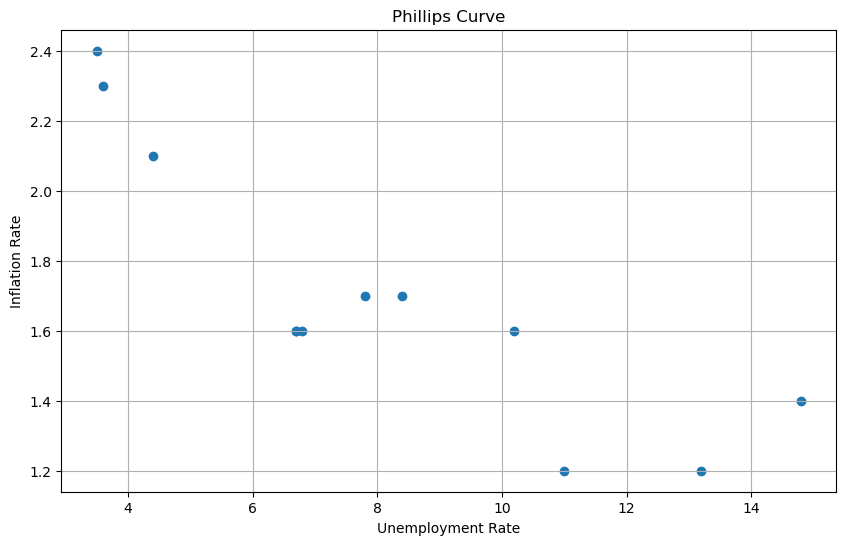

In [ ]:
#Philliphs Curve
phillips_data = pd.merge(inflation_trnsp, unemplotment_trnsp, on='Date')
# Plot Phillips Curve
plt.figure(figsize=(10, 6))
plt.scatter(phillips_data['Unemployment Rate'], phillips_data['Inflation Rate'], marker='o')
plt.title('Phillips Curve')
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()

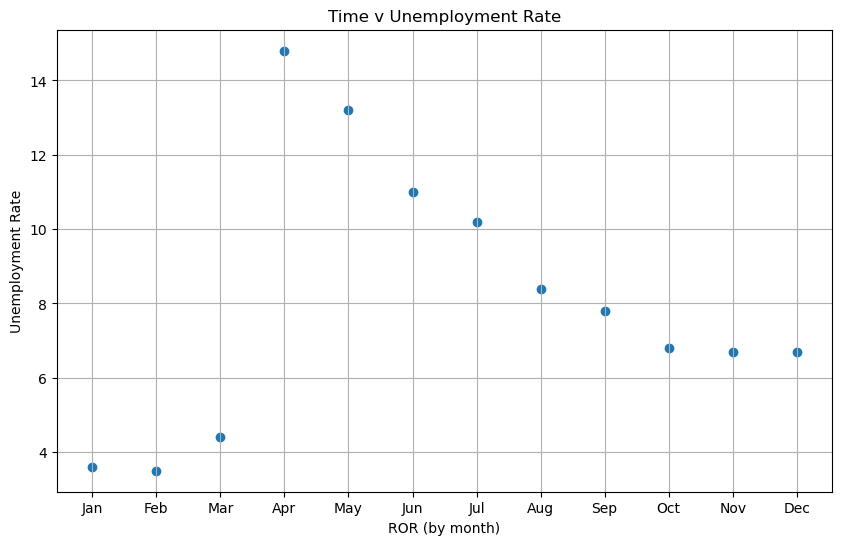

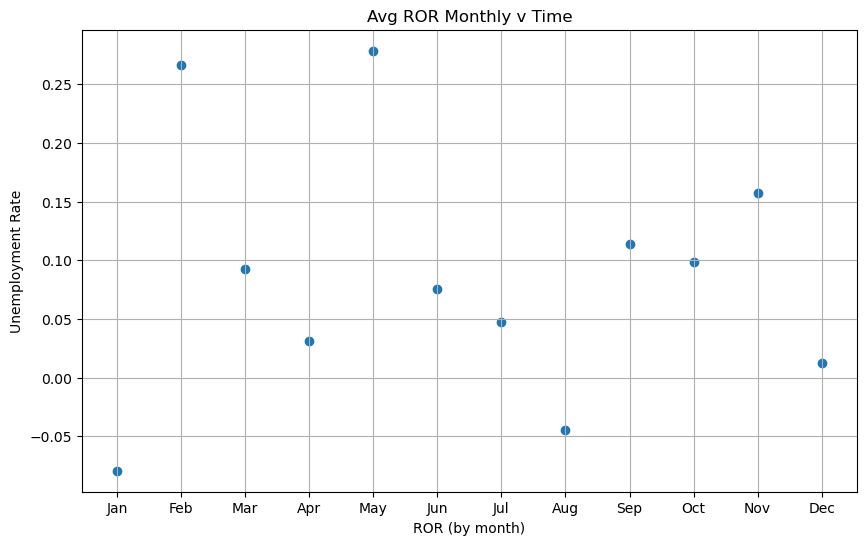

In [39]:
#Unemp vs ror 

# Merge dataframes on 'Date' column
unemror_data = pd.merge(final_stock_month_avg, unemplotment_trnsp, on='Date')

# Plot Monthly Rate of Return vs Unemployment Rate
plt.figure(figsize=(10, 6))
plt.scatter(unemror_data['Date'], unemror_data['Unemployment Rate'], marker='o')
plt.title('Time v Unemployment Rate')
plt.xlabel('ROR (by month)')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(unemror_data['Date'], unemror_data['ROR (by month)'], marker='o')
plt.title('Avg ROR Monthly v Time')
plt.xlabel('ROR (by month)')
plt.ylabel('Unemployment Rate')
plt.grid(True)
plt.show()

In [33]:
unemror_data

,Date,ROR (by month),Unemployment Rate
0,Jan,-0.079250,3.6
1,Feb,0.266276,3.5
2,Mar,0.092436,4.4
3,Apr,0.031624,14.8
4,May,0.278513,13.2
5,Jun,0.075462,11.0
6,Jul,0.047269,10.2
7,Aug,-0.044657,8.4
8,Sep,0.113781,7.8
9,Oct,0.098156,6.8


In [47]:
print(phillips_data.dtypes)
print(inflation_trnsp.columns) 
print (unemplotment_trnsp.columns)

Date                  object
ROR (by month)       float64
Unemployment Rate    float64
dtype: object
Index(['Date', 'Inflation Rate'], dtype='object')
Index(['Date', 'Unemployment Rate'], dtype='object')


                            OLS Regression Results                            
Dep. Variable:         Inflation Rate   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     27.85
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           0.000359
Time:                        23:27:22   Log-Likelihood:                 2.9005
No. Observations:                  12   AIC:                            -1.801
Df Residuals:                      10   BIC:                           -0.8312
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4392      0.15

c:\Users\adibt\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


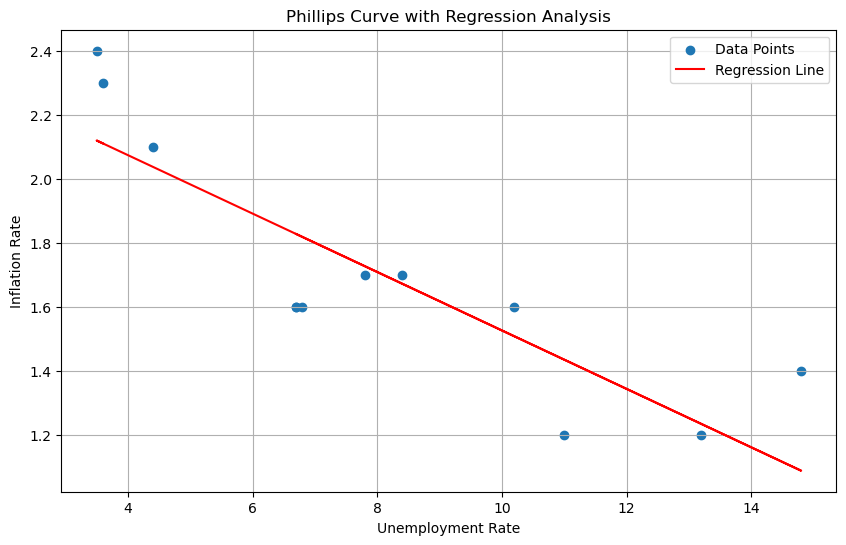

In [49]:
# Define the independent variable (X) and the dependent variable (y)
import statsmodels.api as sm
phillips_data = pd.merge(inflation_trnsp, unemplotment_trnsp, on='Date')
X = phillips_data['Unemployment Rate']  # Independent variable
y = phillips_data['Inflation Rate']     # Dependent variable

# Add a constant to the independent variable (X) for the intercept term
X = sm.add_constant(X)

# Perform Ordinary Least Squares (OLS) regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Plot Phillips Curve with regression line
plt.figure(figsize=(10, 6))
plt.scatter(phillips_data['Unemployment Rate'], phillips_data['Inflation Rate'], marker='o', label='Data Points')
plt.plot(phillips_data['Unemployment Rate'], model.predict(), color='red', label='Regression Line')
plt.title('Phillips Curve with Regression Analysis')
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()